In [ ]:
#PART A)
#In this part, you will be working with the following dataset in your Jupyter Notebook.
#You need to perform these steps one by one and submit your code along with a presentation by the deadline.
#Dataset : Mall_Customers.csv
#Steps:
#I) EDA
#II) Preprocessing Data
#III) K-Means - Elbow
#IV) K-Means - Model
#V) Conclusion

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [30]:
url = 'https://raw.githubusercontent.com/Gaba-csm/DEA113/refs/heads/main/Mall_Customers.csv'
df=pd.read_csv(url)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
# No Null Value - Clean Dataset !

In [11]:
# Check for Duplicates
df[df.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [12]:
# No Duplicates

In [13]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [31]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
Female    112
Male       88
Name: count, dtype: int64


In [14]:
(df == 0).any().any()

np.False_

In [15]:
# No "0" Values

In [16]:
# Print Pearson R correlation matrix
numeric_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
corr_matrix = numeric_df.corr(method='pearson')
print(corr_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


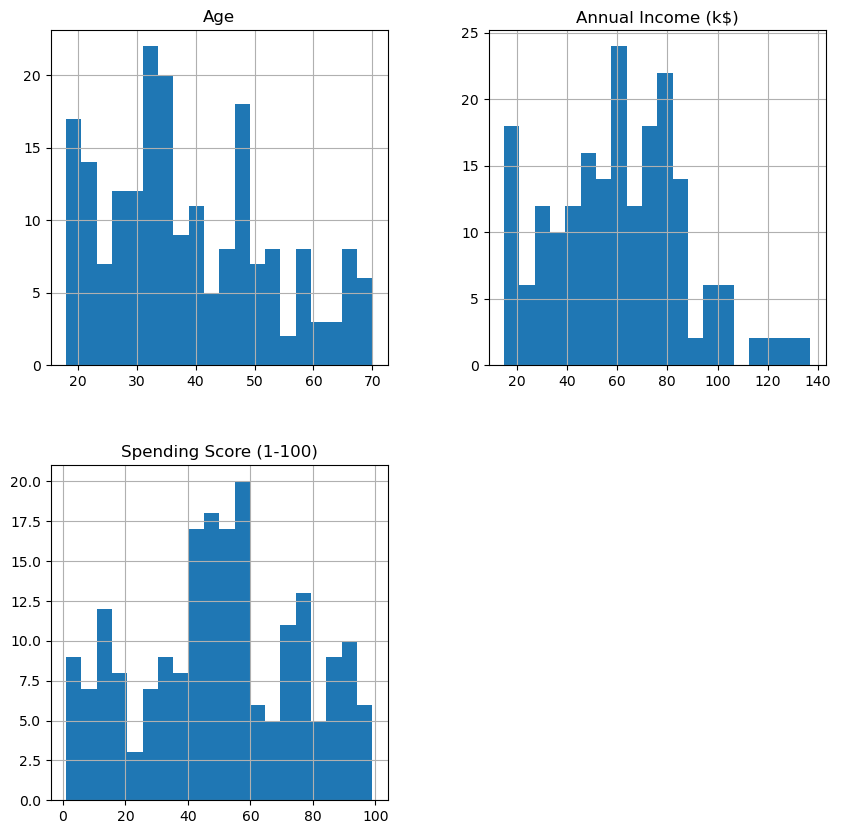

In [17]:
numeric_df.hist(bins=20,figsize=(10, 10))
plt.show()

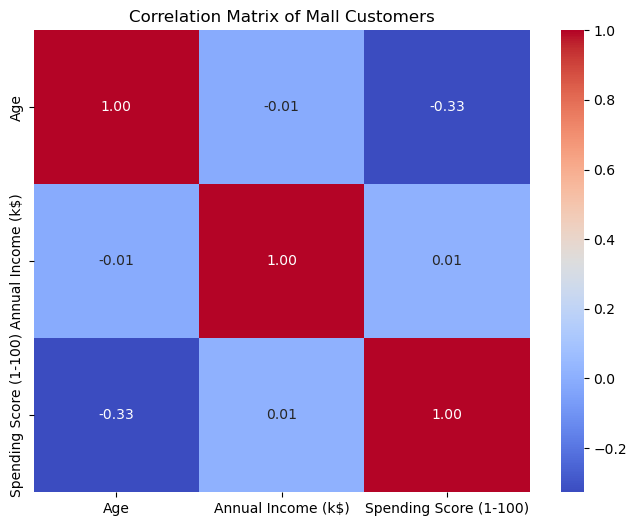

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Mall Customers')
plt.show()

In [21]:
# Significant Correlations
# Age ↔ Spending Score: -0.33

In [22]:
labels = ['18–29', '30–35', '36–40', '41–47', '48+']
df['AgeGroup_quantile'] = pd.qcut(df['Age'], q=5, labels=labels)
df[['Age', 'AgeGroup_quantile']].head(5)

,Age,AgeGroup_quantile
0,19,18–29
1,21,18–29
2,20,18–29
3,23,18–29
4,31,30–35


<Axes: xlabel='AgeGroup_quantile', ylabel='Spending Score (1-100)'>

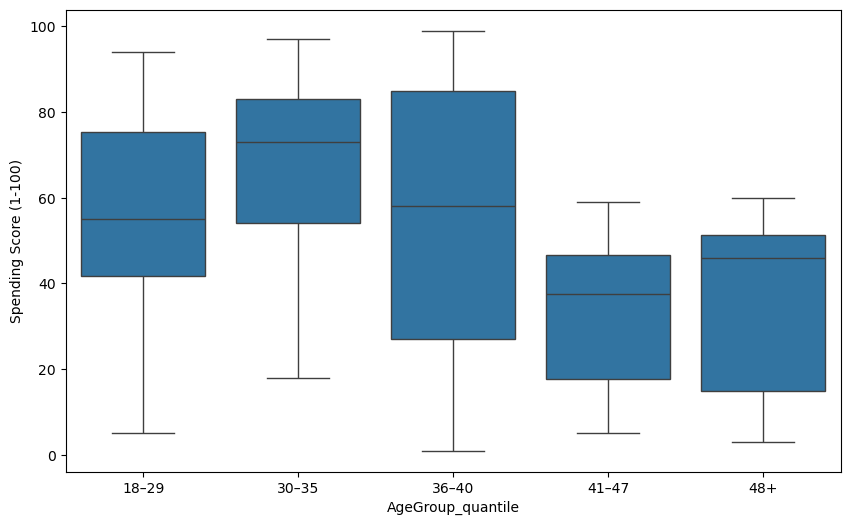

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='AgeGroup_quantile', y='Spending Score (1-100)', data=df)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

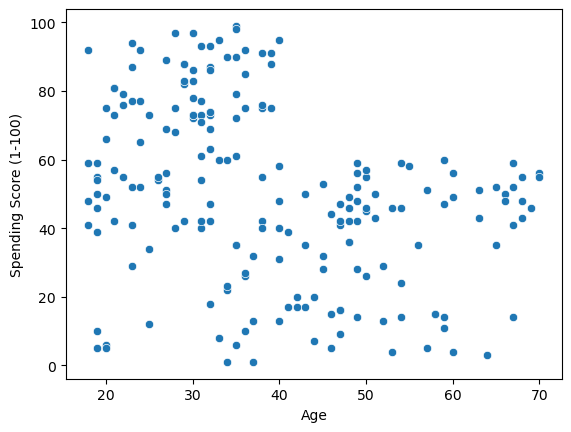

In [24]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)

In [25]:
# K-Means - Elbow Method

[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 33642.57922077922, 26686.837785187785, 24766.471609793436, 23103.122085983905]


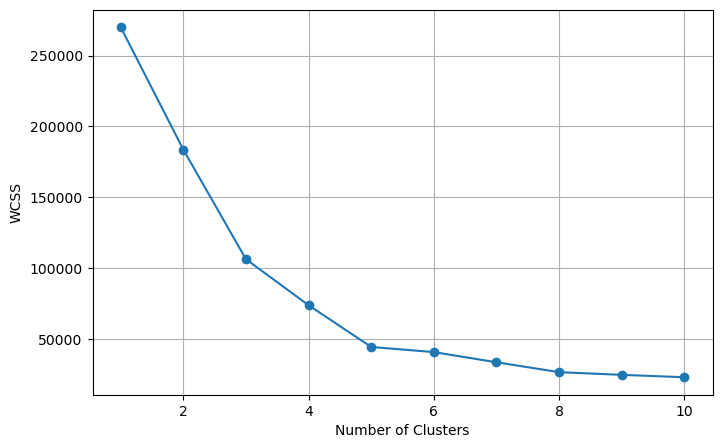

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

print(wcss)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [28]:
#IV) K-Means - Model

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

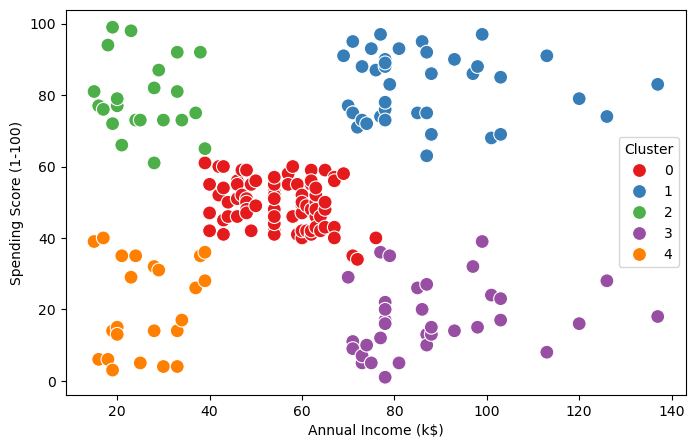

In [29]:
# Fit the KMeans model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)

In [ ]:
#V) Conclusion
# - There is no missing values, no duplicates nor cero values
# - Data set is complete
# - 200 rows data set (112 Female, 88 Male),
# - Gender distribution is slightly skewed, more female than male
# - Mean of features (Age=38.85, Annual Income (k$)= 60.56, Spending Score (1-100)= 50.20)
# - Range of features (Age=18-70, Annual Income (k$)= 15-137, Spending Score (1-100)= 1-99)
# - Spending Score and Annual Income, and Age and Annual Income have little to no linear correlation (near zero correlation coefficient 0.001, -0.01)
# - Age slightly negatively correlates with Spending Score -0.33 (younger customers tend to spend more).
# - From 18 to 40 years old the spending score is well spread espetialy above 30
# - Variables selected for clustering were Annual Income and Spending Score
# - The "elbow" suggests 5 to 8 clusters as optimal, for simplicity k=5
# - Cluster profiles:
#            *  Cluster 0: Average income and spending
#            *  Cluster 1: High income, high spending
#            *  Cluster 2: Low income, high spending
#            *  Cluster 3: High income, low spending
#            *  Cluster 4: Low income, low spending

In [ ]:
## '[]><{}